In [80]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [81]:
is_slippery = False # True

env = gym.make('FrozenLake-v0', is_slippery=is_slippery)
env.reset() # Reset to initial state
env.render() # Render initial state; S=Safe, F=Frozen, H=Hole, G=Goal


SFFF
FHFH
FFFH
HFFG


In [82]:
print("Action space: ", env.action_space)
print("Observation space: ", env.observation_space)

Action space:  Discrete(4)
Observation space:  Discrete(16)


In [83]:
# Trial play, choose action randomly
max_iter = 200
env.reset()
for i in range(max_iter):
    action = env.action_space.sample()
    new_state, reward, done, info = env.step(action)
    print(new_state)
    if done:
        break

0
1
1
1
0
0
1
5


In [84]:
# let's set up some hyperparameters
# these variables are global and will be accessible to
# functions without needing to pass them in explicitly
class hyperparameters:
    
    def __init__(self):
        self.epsilon = 0.8 # Randomness of agent
        self.n_episodes = 100000 # Number of episodes to learn over
        self.n_max_iter = 200 # maximum steps in a given episode
        self.alpha = 0.9 # Learning rate
        self.gamma = 0.96 # Discount factor
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
        
    def update(self, current_episode):
        self.epsilon -= 0.05
        self.epsilon = np.maximum(self.epsilon, 0.05) # lower limit on randomness
        
        self.alpha -= 0.02
        self.alpha = np.maximum(self.alpha, 0.6) # lower limit on learning rate

In [85]:
def select_action(state, simParameters):
    
    if(np.random.uniform(0, 1) < simParameters.epsilon):
        action = env.action_space.sample()
    else:
        action = np.argmax(simParameters.q_table[state, :])
    
    return action

In [86]:
# The learn method implemets the Bellman equation to update the q-table

def learn(old_state, new_state, reward, action, simParameters):
    predict = simParameters.q_table[old_state, action]
    target = reward + simParameters.gamma*np.max(simParameters.q_table[new_state, :])
    simParameters.q_table[old_state, action] = \
        simParameters.q_table[old_state, action] + simParameters.alpha*(target - predict)

In [87]:
# Let's get started!

simParameters = hyperparameters()
rnTracker = np.zeros((simParameters.n_episodes, 2)) # Keep track of reward and nsteps at the end of each episode

initial_reward_tracker = []

for i in range(simParameters.n_episodes):
    state = env.reset()
    reward = 0
    
    for j in range(simParameters.n_max_iter):
        
        action = select_action(state, simParameters)
        
        new_state, reward, done, info = env.step(action)
        
        # Modifying the reward structure a bit
        if(reward == 0):
            reward -= 1
        else:
            reward += 9

        learn(state, new_state, reward, action, simParameters)
        
        state = new_state
        
        #env.render()
        
        if (done):
        #   print("Terminal state reached. Resetting environment")
            break
    
    if((i%10000) == 0):
        simParameters.update(i)
    
    if((i%5000) == 0):
        initial_reward_tracker.append(reward)
        
    rnTracker[i, :] = [1, j] if(state == 15) else [0, j]

In [88]:
print(simParameters.q_table)

[[ 2.39652264  3.53804442  3.53804442  2.39652264]
 [ 2.39652264 -1.          4.7271296   3.53804442]
 [ 3.53804442  5.96576     3.53804442  4.7271296 ]
 [ 4.7271296  -1.          3.53804442  3.53804442]
 [ 3.53804442  4.7271296  -1.          2.39652264]
 [ 0.          0.          0.          0.        ]
 [-1.          7.256      -1.          4.7271296 ]
 [ 0.          0.          0.          0.        ]
 [ 4.7271296  -1.          5.96576     3.53804442]
 [ 4.7271296   7.256       7.256      -1.        ]
 [ 5.96576     8.6        -1.          5.96576   ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-1.          7.256       8.6         5.96576   ]
 [ 7.256       8.6        10.          7.256     ]
 [ 0.          0.          0.          0.        ]]


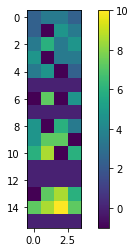

In [89]:
plt.imshow(simParameters.q_table)
plt.colorbar()

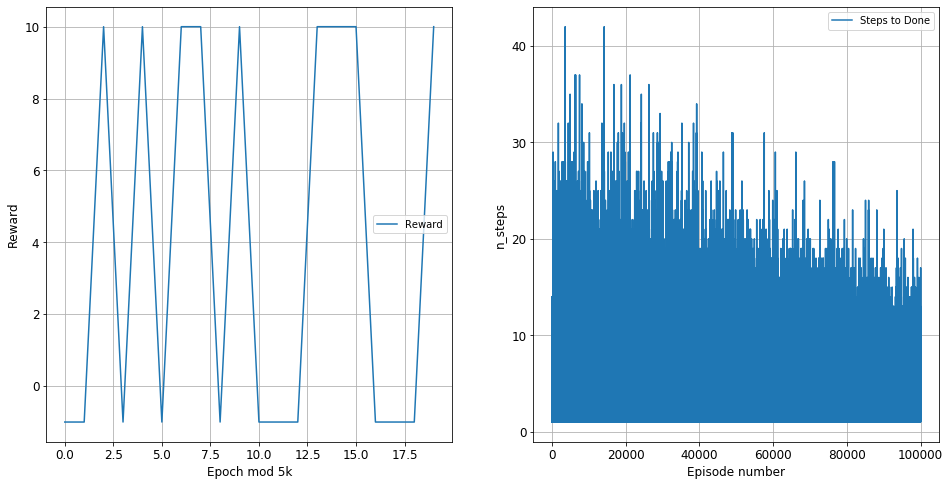

In [90]:
plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
plt.plot(initial_reward_tracker, label = 'Reward')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Epoch mod 5k", fontsize = 12)
plt.ylabel('Reward', fontsize = 12)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(rnTracker[:, 1], label = 'Steps to Done')
plt.xlabel("Episode number", fontsize = 12)
plt.ylabel('n_steps', fontsize = 12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()
plt.legend()

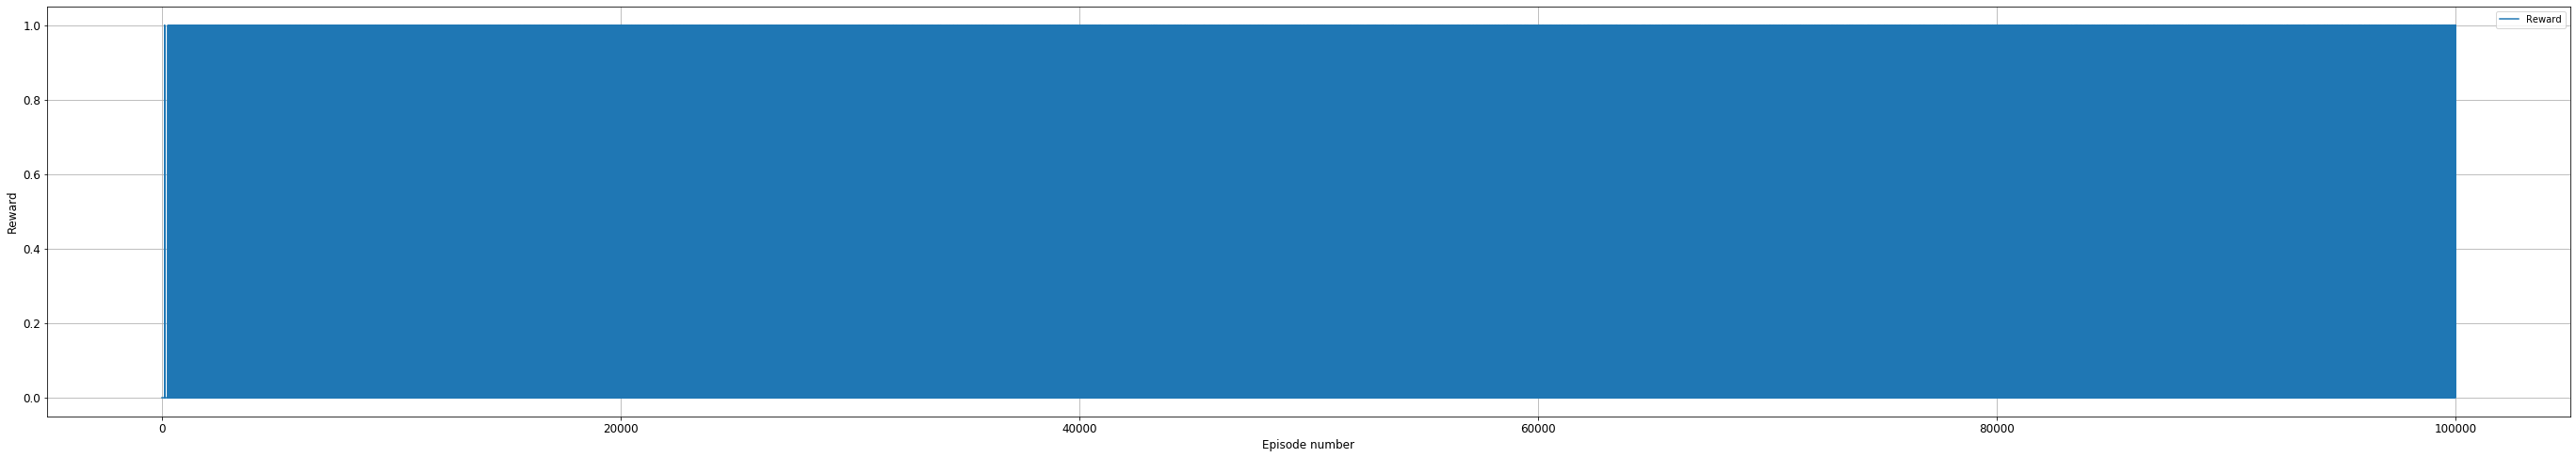

In [91]:
plt.figure(figsize = (48, 8))
plt.plot(rnTracker[:, 0], label = 'Reward')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Episode number", fontsize = 12)
plt.ylabel('Reward', fontsize = 12)
plt.legend()
plt.grid()

In [104]:
# Continue training without resetting Q-table
#simParameters.alpha = 0.9
simParameters.epsilon = 0.

rnTracker = np.zeros((simParameters.n_episodes, 2)) # Keep track of reward and nsteps at the end of each episode
gSteps = [] # Number of steps taken to get to goal

for i in range(simParameters.n_episodes):
    state = env.reset()
    reward = 0
    
    for j in range(simParameters.n_max_iter):
        
        action = select_action(state, simParameters)
        
        new_state, reward, done, info = env.step(action)
        
        # Modifying the reward structure a bit
        if(reward == 0):
            reward -= 1
        else:
            reward += 9

        learn(state, new_state, reward, action, simParameters)
        
        state = new_state
        
        #env.render()
        
        if (done):
        #   print("Terminal state reached. Resetting environment")
            break
    
    if((i%10000) == 0):
        simParameters.update(i)
    
    if((i%5000) == 0):
        initial_reward_tracker.append(reward)
        
    rnTracker[i, :] = [1, j] if(state == 15) else [0, j]
    
    if(state == 15):
        gSteps.append(j+1) # Because counting starts at the zeroth step

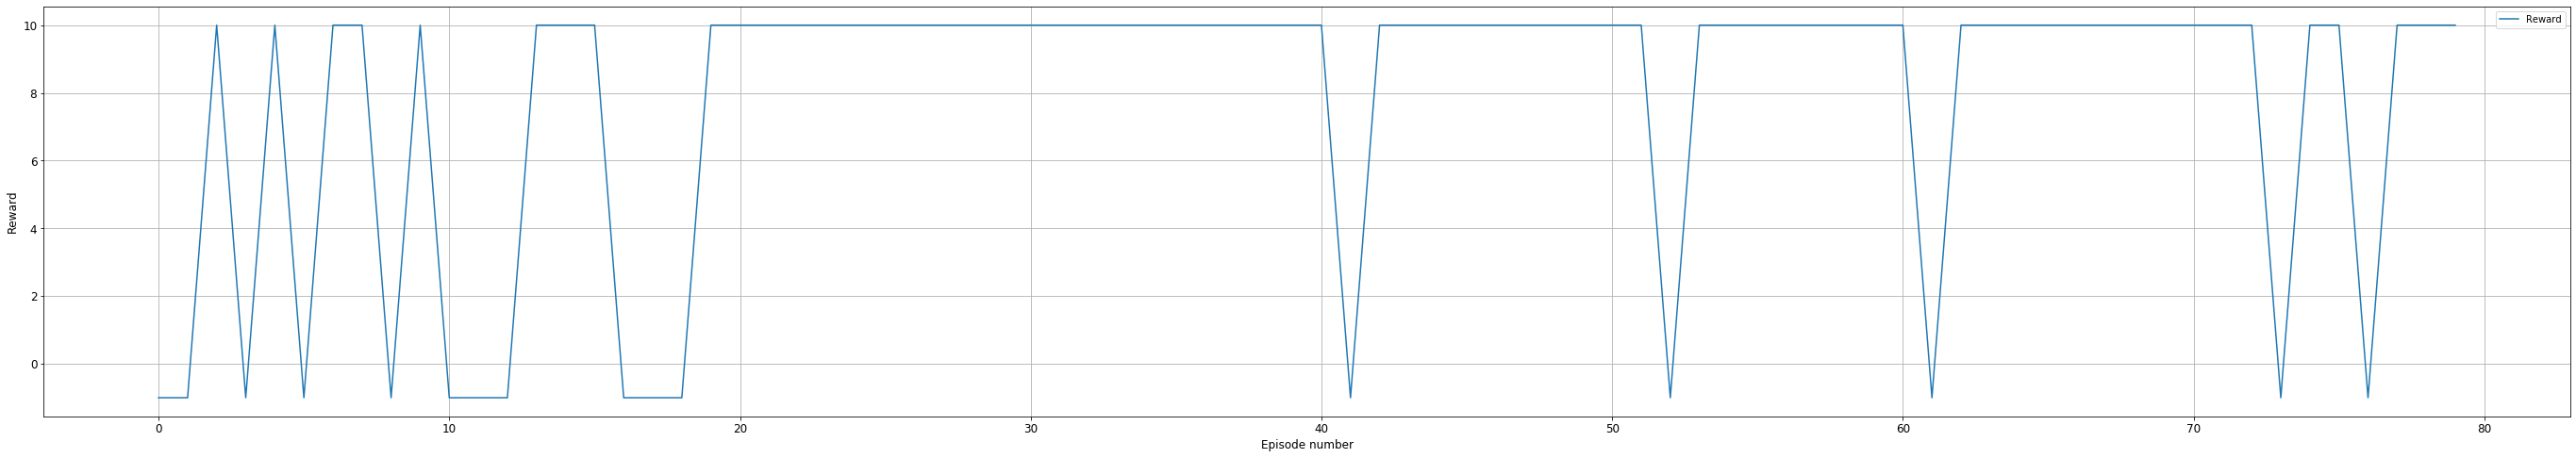

In [105]:
plt.figure(figsize = (48, 8))
plt.plot(initial_reward_tracker, label = 'Reward')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Episode number", fontsize = 12)
plt.ylabel('Reward', fontsize = 12)
plt.legend()
plt.grid()

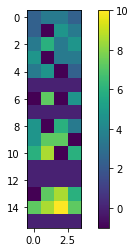

In [106]:
plt.imshow(simParameters.q_table)
plt.colorbar()

In [107]:
print(np.mean(rnTracker[:, 0]), np.mean(gSteps))

0.95031 6.236080857825341


In [102]:
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [103]:
print(simParameters.alpha, simParameters.epsilon)

0.6 0.05
